In [2]:
# https://pandas.pydata.org/docs/user_guide/10min.html

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Object Creation (객체 생성)

In [7]:
s = pd.Series([1,3,5,np.nan,6,8]) # np.nan: numpy에서 제공하는 null 값
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [9]:
dates = pd.date_range('20210311', periods=6) # 기간만큼의 날짜데이터를 생성
dates

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
               '2021-03-15', '2021-03-16'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-15,-1.372951,0.300787,1.121418,-0.546861
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


In [14]:
df2 = pd.DataFrame({"A":1.,
                    "B":pd.Timestamp('20210311'),
                    "C":pd.Series(1, index=list(range(4)), dtype="float32"),
                    "D":np.array([3]*4, dtype="int32"),
                    "E":pd.Categorical(["test", "train", "test", "train"]),
                    "F":"foo"
                   })
df2

,A,B,C,D,E,F
0,1.0,2021-03-11,1.0,3,test,foo
1,1.0,2021-03-11,1.0,3,train,foo
2,1.0,2021-03-11,1.0,3,test,foo
3,1.0,2021-03-11,1.0,3,train,foo


In [15]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 2. Viewing Data (데이터 확인)

In [17]:
df.tail(3) # 끝에서 마지막 3줄을 불러옴

,A,B,C,D
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-15,-1.372951,0.300787,1.121418,-0.546861
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


In [18]:
df.head() # 앞에 5줄을 불러옴

,A,B,C,D
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-15,-1.372951,0.300787,1.121418,-0.546861


In [20]:
df.index

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
               '2021-03-15', '2021-03-16'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
# 컬럼 이름 변경하기
new_columns = ["AA", "BB", "CC", "DD"]
df.columns = new_columns
df

,AA,BB,CC,DD
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-15,-1.372951,0.300787,1.121418,-0.546861
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


In [23]:
df.values

array([[ 1.06985049, -1.03989306, -2.17919105,  1.50006657],
       [ 0.01690738, -0.60043027, -0.41076662, -1.18318886],
       [-0.13570925,  0.42033213, -1.19268365,  1.41466904],
       [ 0.77536274, -1.16659743,  1.52059736,  0.66374961],
       [-1.37295111,  0.30078743,  1.12141821, -0.54686096],
       [ 0.32026347,  1.5974958 , -1.09043698, -0.51251264]])

In [24]:
df.describe() # 대략적인 통계정보 요약

,AA,BB,CC,DD
count,6.000000,6.000000,6.000000,6.000000
mean,0.112287,-0.081384,-0.371844,0.222654
std,0.857483,1.056622,1.433132,1.127499
min,-1.372951,-1.166597,-2.179191,-1.183189
25%,-0.097555,-0.930027,-1.167122,-0.538274
50%,0.168585,-0.149821,-0.750602,0.075618
75%,0.661588,0.390446,0.738372,1.226939
max,1.069850,1.597496,1.520597,1.500067


In [25]:
df.T # 데이터 전치(행과 열 바꿈)

,2021-03-11 00:00:00,2021-03-12 00:00:00,2021-03-13 00:00:00,2021-03-14 00:00:00,2021-03-15 00:00:00,2021-03-16 00:00:00
AA,1.069850,0.016907,-0.135709,0.775363,-1.372951,0.320263
BB,-1.039893,-0.600430,0.420332,-1.166597,0.300787,1.597496
CC,-2.179191,-0.410767,-1.192684,1.520597,1.121418,-1.090437
DD,1.500067,-1.183189,1.414669,0.663750,-0.546861,-0.512513


In [26]:
df.sort_index(axis=1, ascending=False) # 축 별로 정렬

,DD,CC,BB,AA
2021-03-11,1.500067,-2.179191,-1.039893,1.069850
2021-03-12,-1.183189,-0.410767,-0.600430,0.016907
2021-03-13,1.414669,-1.192684,0.420332,-0.135709
2021-03-14,0.663750,1.520597,-1.166597,0.775363
2021-03-15,-0.546861,1.121418,0.300787,-1.372951
2021-03-16,-0.512513,-1.090437,1.597496,0.320263


In [27]:
df.sort_values(by='BB') # 값 별로 정렬

,AA,BB,CC,DD
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-15,-1.372951,0.300787,1.121418,-0.546861
2021-03-13,-0.135709,0.420332,-1.192684,1.414669
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


### 3. Selection (선택)

In [28]:
df['AA'] # 단일 열 선택

2021-03-11    1.069850
2021-03-12    0.016907
2021-03-13   -0.135709
2021-03-14    0.775363
2021-03-15   -1.372951
2021-03-16    0.320263
Freq: D, Name: AA, dtype: float64

In [29]:
df[['AA', 'CC']] # 여러개 열 선택

,AA,CC
2021-03-11,1.069850,-2.179191
2021-03-12,0.016907,-0.410767
2021-03-13,-0.135709,-1.192684
2021-03-14,0.775363,1.520597
2021-03-15,-1.372951,1.121418
2021-03-16,0.320263,-1.090437


In [33]:
df[0:3]
st = 0; en = 3;
df[st:en] # 행을 통해 분할

,AA,BB,CC,DD
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669


In [31]:
df['20210311':'20210313']

,AA,BB,CC,DD
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669


#### 1) Selection ny Label (Label을 통한 선택)

In [35]:
df.loc[dates[0]] # 0번째 행을 불러와서 Series(열)로 반환

AA    1.069850
BB   -1.039893
CC   -2.179191
DD    1.500067
Name: 2021-03-11 00:00:00, dtype: float64

In [41]:
df.loc[:,['AA','BB']] # 여러 축의 데이터 가져오기
# = df[['AA', 'BB']] 같은 결과

,AA,BB
2021-03-11,1.069850,-1.039893
2021-03-12,0.016907,-0.600430
2021-03-13,-0.135709,0.420332
2021-03-14,0.775363,-1.166597
2021-03-15,-1.372951,0.300787
2021-03-16,0.320263,1.597496


In [42]:
df[['AA', 'BB']]

,AA,BB
2021-03-11,1.069850,-1.039893
2021-03-12,0.016907,-0.600430
2021-03-13,-0.135709,0.420332
2021-03-14,0.775363,-1.166597
2021-03-15,-1.372951,0.300787
2021-03-16,0.320263,1.597496


In [43]:
df.loc['20210311':'20210314', ['AA', 'BB']] # 라벨 슬라이싱

,AA,BB
2021-03-11,1.069850,-1.039893
2021-03-12,0.016907,-0.600430
2021-03-13,-0.135709,0.420332
2021-03-14,0.775363,-1.166597


In [44]:
df.loc['20210313', ['AA', 'CC']] # 1개만 추출할 땐 Series형태로 반환됨

AA   -0.135709
CC   -1.192684
Name: 2021-03-13 00:00:00, dtype: float64

In [45]:
df.loc[dates[0], 'AA'] # 스칼라 값을 얻음

1.0698504942913245

In [46]:
df.at[dates[0], 'AA'] # 스칼라 값을 더 빠르게 구하는 방법

1.0698504942913245

#### 2) Selection by Position(위치로 선택하기)

In [48]:
# 넘겨받은 정수의 위치정보를 기준으로 선택
df.iloc[3]

AA    0.775363
BB   -1.166597
CC    1.520597
DD    0.663750
Name: 2021-03-14 00:00:00, dtype: float64

In [49]:
df.iloc[3:5, 0:2] # 슬라이싱을 통해 선택

,AA,BB
2021-03-14,0.775363,-1.166597
2021-03-15,-1.372951,0.300787


In [50]:
df.iloc[[1,2,4], [0,2]] # 리스트 형태로 선택

,AA,CC
2021-03-12,0.016907,-0.410767
2021-03-13,-0.135709,-1.192684
2021-03-15,-1.372951,1.121418


In [51]:
df.iloc[1:3, :] # 명시적으로 행을 나누고자 할 때

,AA,BB,CC,DD
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-13,-0.135709,0.420332,-1.192684,1.414669


In [52]:
df.iloc[:, 1:3] # 명시적으로 열을 나누고자 할 때

,BB,CC
2021-03-11,-1.039893,-2.179191
2021-03-12,-0.600430,-0.410767
2021-03-13,0.420332,-1.192684
2021-03-14,-1.166597,1.520597
2021-03-15,0.300787,1.121418
2021-03-16,1.597496,-1.090437


In [53]:
df.iloc[1,1] # 명시적으로 특정한 값을 얻고자 할 때

-0.6004302739606803

In [54]:
df.iat[1,1] # 빠르게 스칼라 값을 얻는 방법

-0.6004302739606803

#### 3) Boolean Indexing

In [57]:
df[df.AA > 0] # AA열에서 0보다 큰 데이터 추출

,AA,BB,CC,DD
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


In [60]:
df["AA"] > 0

2021-03-11     True
2021-03-12     True
2021-03-13    False
2021-03-14     True
2021-03-15    False
2021-03-16     True
Freq: D, Name: AA, dtype: bool

In [61]:
df.AA > 0

2021-03-11     True
2021-03-12     True
2021-03-13    False
2021-03-14     True
2021-03-15    False
2021-03-16     True
Freq: D, Name: AA, dtype: bool

In [62]:
df[df["AA"]>0] # 데이터프레임에서 조건을 충족하는 값 선택

,AA,BB,CC,DD
2021-03-11,1.069850,-1.039893,-2.179191,1.500067
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189
2021-03-14,0.775363,-1.166597,1.520597,0.663750
2021-03-16,0.320263,1.597496,-1.090437,-0.512513


In [63]:
df[df>0] # 만족하지 않으면 null 값으로 출력

,AA,BB,CC,DD
2021-03-11,1.069850,NaN,NaN,1.500067
2021-03-12,0.016907,NaN,NaN,NaN
2021-03-13,NaN,0.420332,NaN,1.414669
2021-03-14,0.775363,NaN,1.520597,0.663750
2021-03-15,NaN,0.300787,1.121418,NaN
2021-03-16,0.320263,1.597496,NaN,NaN


In [67]:
# 필터링을 위한 메서드 isin()
df2 = df.copy() # copy()를 사용하지 않으면 원본데이터도 수정됨
df2['EE'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,AA,BB,CC,DD,EE
2021-03-11,1.069850,-1.039893,-2.179191,1.500067,one
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189,one
2021-03-13,-0.135709,0.420332,-1.192684,1.414669,two
2021-03-14,0.775363,-1.166597,1.520597,0.663750,three
2021-03-15,-1.372951,0.300787,1.121418,-0.546861,four
2021-03-16,0.320263,1.597496,-1.090437,-0.512513,three


In [68]:
df2[df2['EE'].isin(['two', 'four'])] # EE컬럼에서 two, four인 값만 추출

,AA,BB,CC,DD,EE
2021-03-13,-0.135709,0.420332,-1.192684,1.414669,two
2021-03-15,-1.372951,0.300787,1.121418,-0.546861,four


#### 4) Setting (설정)

In [83]:
# 새 열을 설정하면 데이터가 인덱스 별로 자동 정렬
# 데이터 개수와 인덱스 개수는 일치해야 된다
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210312', periods=6))
s1

2021-03-12    1
2021-03-13    2
2021-03-14    3
2021-03-15    4
2021-03-16    5
2021-03-17    6
Freq: D, dtype: int64

In [84]:
df['FF'] = s1

In [85]:
df

,AA,BB,CC,DD,FF
2021-03-11,1.069850,-1.039893,-2.179191,1.500067,NaN
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189,1.0
2021-03-13,-0.135709,0.420332,-1.192684,1.414669,2.0
2021-03-14,0.775363,-1.166597,1.520597,0.663750,3.0
2021-03-15,-1.372951,0.300787,1.121418,-0.546861,4.0
2021-03-16,0.320263,1.597496,-1.090437,-0.512513,5.0


In [86]:
# 라벨에 의해 값 설정
df.at[dates[0], 'AA']=0 # 0행의 AA값

In [87]:
df

,AA,BB,CC,DD,FF
2021-03-11,0.000000,-1.039893,-2.179191,1.500067,NaN
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189,1.0
2021-03-13,-0.135709,0.420332,-1.192684,1.414669,2.0
2021-03-14,0.775363,-1.166597,1.520597,0.663750,3.0
2021-03-15,-1.372951,0.300787,1.121418,-0.546861,4.0
2021-03-16,0.320263,1.597496,-1.090437,-0.512513,5.0


In [88]:
df.iat[0,1] = 0 # 0행의 1열인 BB의 2021-03-11 값

In [89]:
df

,AA,BB,CC,DD,FF
2021-03-11,0.000000,0.000000,-2.179191,1.500067,NaN
2021-03-12,0.016907,-0.600430,-0.410767,-1.183189,1.0
2021-03-13,-0.135709,0.420332,-1.192684,1.414669,2.0
2021-03-14,0.775363,-1.166597,1.520597,0.663750,3.0
2021-03-15,-1.372951,0.300787,1.121418,-0.546861,4.0
2021-03-16,0.320263,1.597496,-1.090437,-0.512513,5.0


In [90]:
# loc, iloc, at, iat 잘 알아두기~!

In [93]:
np.array([5]*len(df))

array([5, 5, 5, 5, 5, 5])

In [95]:
# Numpy 배열을 사용한 할당에 의해 값 설정
df.loc[:, 'DD'] = np.array([5]*len(df))

In [96]:
df

,AA,BB,CC,DD,FF
2021-03-11,0.000000,0.000000,-2.179191,5,NaN
2021-03-12,0.016907,-0.600430,-0.410767,5,1.0
2021-03-13,-0.135709,0.420332,-1.192684,5,2.0
2021-03-14,0.775363,-1.166597,1.520597,5,3.0
2021-03-15,-1.372951,0.300787,1.121418,5,4.0
2021-03-16,0.320263,1.597496,-1.090437,5,5.0


In [97]:
# where 연산 설정
df2 = df.copy()
df2[df2 > 0] = -df2 # 0보다 큰 수에 -를 붙임

In [98]:
df2

,AA,BB,CC,DD,FF
2021-03-11,0.000000,0.000000,-2.179191,-5,NaN
2021-03-12,-0.016907,-0.600430,-0.410767,-5,-1.0
2021-03-13,-0.135709,-0.420332,-1.192684,-5,-2.0
2021-03-14,-0.775363,-1.166597,-1.520597,-5,-3.0
2021-03-15,-1.372951,-0.300787,-1.121418,-5,-4.0
2021-03-16,-0.320263,-1.597496,-1.090437,-5,-5.0


### 4. Missing Data(결측치)
- pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용
- Reindexing은 데이터의 복사본을 반환

In [104]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['EE'])

In [105]:
df1

,AA,BB,CC,DD,FF,EE
2021-03-11,0.000000,0.000000,-2.179191,5,NaN,NaN
2021-03-12,0.016907,-0.600430,-0.410767,5,1.0,NaN
2021-03-13,-0.135709,0.420332,-1.192684,5,2.0,NaN
2021-03-14,0.775363,-1.166597,1.520597,5,3.0,NaN


In [106]:
df1.loc[dates[0]:dates[1], 'EE'] = 1

In [107]:
df1

,AA,BB,CC,DD,FF,EE
2021-03-11,0.000000,0.000000,-2.179191,5,NaN,1.0
2021-03-12,0.016907,-0.600430,-0.410767,5,1.0,1.0
2021-03-13,-0.135709,0.420332,-1.192684,5,2.0,NaN
2021-03-14,0.775363,-1.166597,1.520597,5,3.0,NaN


In [109]:
# missing data(NaN) 행 삭제
df1.dropna(how='any')

,AA,BB,CC,DD,FF,EE
2021-03-12,0.016907,-0.60043,-0.410767,5,1.0,1.0


In [110]:
df1.fillna(value=5) # NaN에 5를 채워넣음

,AA,BB,CC,DD,FF,EE
2021-03-11,0.000000,0.000000,-2.179191,5,5.0,1.0
2021-03-12,0.016907,-0.600430,-0.410767,5,1.0,1.0
2021-03-13,-0.135709,0.420332,-1.192684,5,2.0,5.0
2021-03-14,0.775363,-1.166597,1.520597,5,3.0,5.0


In [111]:
# 데이터프레임의 모든 값을 boolean 형태로 표시
# nan인 값에만 True 표시
pd.isna(df1)

,AA,BB,CC,DD,FF,EE
2021-03-11,False,False,False,False,True,False
2021-03-12,False,False,False,False,False,False
2021-03-13,False,False,False,False,False,True
2021-03-14,False,False,False,False,False,True


### 5. Operation (연산)

#### 1) Stats (통계)

In [114]:
# 일반적으로 결측치를 제외한 후 연산
df.mean(0) # 컬럼에 대한 평균

AA   -0.066021
BB    0.091931
CC   -0.371844
DD    5.000000
FF    3.000000
dtype: float64

In [113]:
df.mean(1) # 행에 대한 평균

2021-03-11    0.705202
2021-03-12    1.001142
2021-03-13    1.218388
2021-03-14    1.825873
2021-03-15    1.809851
2021-03-16    2.165464
Freq: D, dtype: float64

In [115]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [116]:
s

2021-03-11    NaN
2021-03-12    NaN
2021-03-13    1.0
2021-03-14    3.0
2021-03-15    5.0
2021-03-16    NaN
Freq: D, dtype: float64

In [118]:
df.sub(s, axis='index') # df 데이터프레임에서 s를 빼줌

,AA,BB,CC,DD,FF
2021-03-11,NaN,NaN,NaN,NaN,NaN
2021-03-12,NaN,NaN,NaN,NaN,NaN
2021-03-13,-1.135709,-0.579668,-2.192684,4.0,1.0
2021-03-14,-2.224637,-4.166597,-1.479403,2.0,0.0
2021-03-15,-6.372951,-4.699213,-3.878582,0.0,-1.0
2021-03-16,NaN,NaN,NaN,NaN,NaN


#### 2) Apply (적용)

In [121]:
# 데이터에 함수를 일괄적으로 적용
df.apply(np.cumsum) # 누적합

,AA,BB,CC,DD,FF
2021-03-11,0.000000,0.000000,-2.179191,5,NaN
2021-03-12,0.016907,-0.600430,-2.589958,10,1.0
2021-03-13,-0.118802,-0.180098,-3.782641,15,3.0
2021-03-14,0.656561,-1.346696,-2.262044,20,6.0
2021-03-15,-0.716390,-1.045908,-1.140626,25,10.0
2021-03-16,-0.396127,0.551588,-2.231063,30,15.0


In [122]:
df.apply(lambda x: x.max() - x.min())

AA    2.148314
BB    2.764093
CC    3.699788
DD    0.000000
FF    4.000000
dtype: float64

#### 3) Histogramming (히스토그래밍)

In [132]:
np.random.seed(0) # 난수를 예측 가능하도록 만듬
s = pd.Series(np.random.randint(0, 7, size=10))

In [133]:
s

0    4
1    5
2    0
3    3
4    3
5    3
6    1
7    3
8    5
9    2
dtype: int32

In [125]:
s.value_counts()

4    4
6    3
2    2
1    1
dtype: int64

#### 4) String Method (문자열 메소드)

In [127]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 6. Merge (병합)

#### 1) Concat(연결)

In [134]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.950088,-0.151357,-0.103219,0.410599
1,0.144044,1.454274,0.761038,0.121675
2,0.443863,0.333674,1.494079,-0.205158
3,0.313068,-0.854096,-2.552990,0.653619
4,0.864436,-0.742165,2.269755,-1.454366
5,0.045759,-0.187184,1.532779,1.469359
6,0.154947,0.378163,-0.887786,-1.980796
7,-0.347912,0.156349,1.230291,1.202380
8,-0.387327,-0.302303,-1.048553,-1.420018
9,-1.706270,1.950775,-0.509652,-0.438074


In [135]:
pieces = [df[:3], df[3:7], df[7:]]

In [136]:
pd.concat(pieces)

,0,1,2,3
0,0.950088,-0.151357,-0.103219,0.410599
1,0.144044,1.454274,0.761038,0.121675
2,0.443863,0.333674,1.494079,-0.205158
3,0.313068,-0.854096,-2.552990,0.653619
4,0.864436,-0.742165,2.269755,-1.454366
5,0.045759,-0.187184,1.532779,1.469359
6,0.154947,0.378163,-0.887786,-1.980796
7,-0.347912,0.156349,1.230291,1.202380
8,-0.387327,-0.302303,-1.048553,-1.420018
9,-1.706270,1.950775,-0.509652,-0.438074


#### 2) Join (결합)
- sql 방식으로 병합

In [138]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})

In [143]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4,5]})

In [144]:
left

,key,lval
0,foo,1
1,foo,2


In [145]:
right

,key,rval
0,foo,4
1,foo,5


In [146]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [149]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1,2]})

In [154]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4,5]})

In [155]:
left

,key,lval
0,foo,1
1,bar,2


In [156]:
right

,key,rval
0,foo,4
1,bar,5


In [157]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 3) Append (추가)
데이터프레임에 행 추가

In [158]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826
7,0.402342,-0.684810,-0.870797,-0.578850


In [159]:
s = df.iloc[3]

In [162]:
df.append(s)

,A,B,C,D
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826
7,0.402342,-0.684810,-0.870797,-0.578850
3,-0.634322,-0.362741,-0.672460,-0.359553


In [164]:
df.append(s, ignore_index=True) # 자동으로 인덱스 변경

,A,B,C,D
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826
7,0.402342,-0.684810,-0.870797,-0.578850
8,-0.634322,-0.362741,-0.672460,-0.359553


### 7. Grouping (그룹화)
그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킨다.
- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할(splitting)
- 각 그룹에 독립적으로 함수를 적용 (applying)
- 결과물들을 하나의 데이터 구조로 결합 (combining)

In [165]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })

In [166]:
df

,A,B,C,D
0,foo,one,-0.311553,1.178780
1,bar,one,0.056165,-0.179925
2,foo,two,-1.165150,-1.070753
3,bar,three,0.900826,1.054452
4,foo,two,0.465662,-0.403177
5,bar,two,-1.536244,1.222445
6,foo,one,1.488252,0.208275
7,foo,three,1.895889,0.976639


In [167]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.579252,2.096972
foo,2.373101,0.889764


In [168]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.056165 -0.179925
    three  0.900826  1.054452
    two   -1.536244  1.222445
foo one    1.176700  1.387055
    three  1.895889  0.976639
    two   -0.699487 -1.473930

### Reshaping (변형)

#### 1) Stack (스택)

In [169]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [170]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [175]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [176]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     1.867559  0.906045
      two    -0.861226  1.910065
baz   one    -0.268003  0.802456
      two     0.947252 -0.155010
foo   one     0.614079  0.922207
      two     0.376426 -1.099401
qux   one     0.298238  1.326386
      two    -0.694568 -0.149635

In [177]:
df2  =  df[:4]
df2

A         B
first second                    
bar   one     1.867559  0.906045
      two    -0.861226  1.910065
baz   one    -0.268003  0.802456
      two     0.947252 -0.155010

In [178]:
stacked = df2.stack() # 데이터프레임 열들의 계층을 '압축'
stacked

first  second   
bar    one     A    1.867559
               B    0.906045
       two     A   -0.861226
               B    1.910065
baz    one     A   -0.268003
               B    0.802456
       two     A    0.947252
               B   -0.155010
dtype: float64

In [179]:
# “Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack한다.
stacked.unstack()

A         B
first second                    
bar   one     1.867559  0.906045
      two    -0.861226  1.910065
baz   one    -0.268003  0.802456
      two     0.947252 -0.155010

In [180]:
stacked.unstack(1) # 1 레벨

second        one       two
first                      
bar   A  1.867559 -0.861226
      B  0.906045  1.910065
baz   A -0.268003  0.947252
      B  0.802456 -0.155010

In [181]:
stacked.unstack(0) # 0 레벨

first          bar       baz
second                      
one    A  1.867559 -0.268003
       B  0.906045  0.802456
two    A -0.861226  0.947252
       B  1.910065 -0.155010

#### 2) Pivot Tables (피봇 테이블)

In [182]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [183]:
df

,A,B,C,D,E
0,one,A,foo,-0.435154,0.396007
1,one,B,foo,1.849264,-1.093062
2,two,C,foo,0.672295,-1.491258
3,three,A,bar,0.407462,0.439392
4,one,B,bar,-0.769916,0.166673
5,one,C,bar,0.539249,0.635031
6,two,A,foo,-0.674333,2.383145
7,three,B,foo,0.031831,0.944479
8,one,C,foo,-0.635846,-0.912822
9,one,A,bar,0.676433,1.117016


In [184]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.676433 -0.435154
      B -0.769916  1.849264
      C  0.539249 -0.635846
three A  0.407462       NaN
      B       NaN  0.031831
      C -0.208299       NaN
two   A       NaN -0.674333
      B  0.576591       NaN
      C       NaN  0.672295

### 9. Time Series (시계열)
- Pandas는 자주 일어나는 변환사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수 제공
- 이는 재무(금융) 응용에서 매우 일반적이다.

In [187]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [188]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [189]:
ts

2012-01-01 00:00:00     69
2012-01-01 00:00:01    357
2012-01-01 00:00:02    396
2012-01-01 00:00:03     44
2012-01-01 00:00:04    373
2012-01-01 00:00:05    253
2012-01-01 00:00:06    322
2012-01-01 00:00:07    111
2012-01-01 00:00:08     91
2012-01-01 00:00:09    341
2012-01-01 00:00:10    423
2012-01-01 00:00:11     39
2012-01-01 00:00:12    459
2012-01-01 00:00:13    150
2012-01-01 00:00:14    414
2012-01-01 00:00:15    145
2012-01-01 00:00:16    198
2012-01-01 00:00:17    455
2012-01-01 00:00:18    274
2012-01-01 00:00:19    348
2012-01-01 00:00:20     43
2012-01-01 00:00:21     83
2012-01-01 00:00:22    433
2012-01-01 00:00:23    297
2012-01-01 00:00:24     93
2012-01-01 00:00:25    174
2012-01-01 00:00:26    405
2012-01-01 00:00:27    201
2012-01-01 00:00:28    345
2012-01-01 00:00:29    498
                      ... 
2012-01-01 00:01:10    220
2012-01-01 00:01:11    420
2012-01-01 00:01:12    281
2012-01-01 00:01:13    288
2012-01-01 00:01:14    426
2012-01-01 00:01:15    270
2

In [190]:
ts.resample('5Min').sum()

2012-01-01    25101
Freq: 5T, dtype: int32

In [193]:
# 시간대 표현
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [195]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [196]:
ts

2012-03-06   -1.104383
2012-03-07    0.052165
2012-03-08   -0.739563
2012-03-09    1.543015
2012-03-10   -1.292857
Freq: D, dtype: float64

In [197]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -1.104383
2012-03-07 00:00:00+00:00    0.052165
2012-03-08 00:00:00+00:00   -0.739563
2012-03-09 00:00:00+00:00    1.543015
2012-03-10 00:00:00+00:00   -1.292857
Freq: D, dtype: float64

In [198]:
# 다른 시간대로 변환
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.104383
2012-03-06 19:00:00-05:00    0.052165
2012-03-07 19:00:00-05:00   -0.739563
2012-03-08 19:00:00-05:00    1.543015
2012-03-09 19:00:00-05:00   -1.292857
Freq: D, dtype: float64

In [200]:
# 시간표현 <-> 기간 표현으로 변환
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [202]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.771791
2012-02-29    0.823504
2012-03-31    2.163236
2012-04-30    1.336528
2012-05-31   -0.369182
Freq: M, dtype: float64

In [203]:
ps = ts.to_period()
ps

2012-01    0.771791
2012-02    0.823504
2012-03    2.163236
2012-04    1.336528
2012-05   -0.369182
Freq: M, dtype: float64

In [204]:
ps.to_timestamp()

2012-01-01    0.771791
2012-02-01    0.823504
2012-03-01    2.163236
2012-04-01    1.336528
2012-05-01   -0.369182
Freq: MS, dtype: float64

### 10. Categoricals (범주화)

In [206]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [208]:
# 가공하지 않은 성적을 범주형 데이터로 변환
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [209]:
# 의미있는 이름 붙이기
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [210]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [211]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [212]:
# 정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열됨
df.sort_values(by="grade") # 성적순으로 정렬

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [217]:
df.groupby("grade") # object이기 때문에 함수를 사용해서 결과값을 얻을 수 있음

In [213]:
df.groupby("grade").size() # 열을 기준으로 그룹화하여 빈 범주 표시

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [220]:
df["grade"].value_counts() # 위의 문장과 같은 결과

very good    3
good         2
very bad     1
medium       0
bad          0
Name: grade, dtype: int64

### 11. Plotting (그래프)

In [214]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [224]:
ts

2000-01-01    -0.239379
2000-01-02     0.860280
2000-01-03     1.515544
2000-01-04     2.155676
2000-01-05     0.538720
2000-01-06     0.514394
2000-01-07    -0.223637
2000-01-08     0.056287
2000-01-09    -0.041863
2000-01-10     0.868316
2000-01-11     1.185534
2000-01-12     1.971862
2000-01-13     1.505443
2000-01-14     0.560997
2000-01-15     0.150947
2000-01-16     0.133926
2000-01-17     0.513078
2000-01-18     2.772387
2000-01-19     2.730130
2000-01-20     1.774185
2000-01-21     1.428203
2000-01-22     0.964607
2000-01-23     1.446089
2000-01-24    -0.094708
2000-01-25    -0.031446
2000-01-26     0.125060
2000-01-27     0.357241
2000-01-28    -0.240075
2000-01-29    -0.477997
2000-01-30    -1.902057
                ...    
2002-08-28   -44.885114
2002-08-29   -44.114441
2002-08-30   -44.244881
2002-08-31   -42.422966
2002-09-01   -42.498616
2002-09-02   -42.077698
2002-09-03   -41.831096
2002-09-04   -42.456653
2002-09-05   -41.464516
2002-09-06   -39.559452
2002-09-07   -39

In [215]:
ts = ts.cumsum()

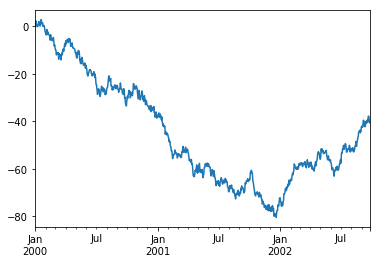

In [216]:
ts.plot()

In [221]:
# 여러개의 컬럼
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [222]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

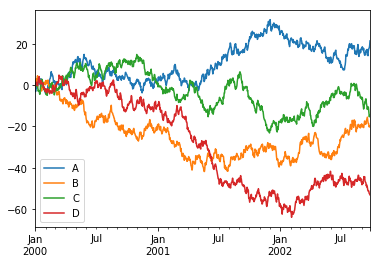

In [223]:
plt.figure(); df.plot(); plt.legend(loc='best')

### 12. Getting Data In / Out (데이터 입/출력)

#### 1) CSV

In [225]:
df.to_csv('foo.csv')

In [228]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.962732,1.584821,0.647968,-1.139008
1,2000-01-02,-3.177133,2.455782,-0.230003,0.157142
2,2000-01-03,-2.560674,2.992379,0.174693,0.348593
3,2000-01-04,-1.680163,2.538298,0.260645,1.100539
4,2000-01-05,-1.117173,1.343312,-0.239765,1.353343


In [233]:
df.to_csv('foo1.csv', index=False)

In [234]:
pd.read_csv('foo1.csv').head()

,A,B,C,D
0,-1.962732,1.584821,0.647968,-1.139008
1,-3.177133,2.455782,-0.230003,0.157142
2,-2.560674,2.992379,0.174693,0.348593
3,-1.680163,2.538298,0.260645,1.100539
4,-1.117173,1.343312,-0.239765,1.353343


#### 2) HDF5

In [ ]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

#### 3) Excel

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### 13. Gotchas

In [239]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [240]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
